## Will the customer buy a product after entering the shop

In [105]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
df_purchase=pd.read_csv('purchase data.csv')
scaler=pickle.load(open('scaler.pickle','rb'))
pca=pickle.load(open('pca.pickle','rb'))
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))
#Standardization
features=df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std=scaler.transform(features)
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors=df_purchase.copy()
df_purchase_predictors['Segments']=purchase_segm_kmeans_pca
segment_dummies=pd.get_dummies(purchase_segm_kmeans_pca,prefix='Segment',prefix_sep='_')
df_purchase_predictors=pd.concat([df_purchase_predictors,segment_dummies],axis=1)

df_pa=df_purchase_predictors.copy()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


## Purchase Probability Model

In [3]:
Y=df_pa['Incidence']

In [4]:
X=pd.DataFrame()
X['Mean_Price']=(df_pa['Price_1']+df_pa['Price_2']+df_pa['Price_3']+df_pa['Price_4']+df_pa['Price_5'])/5

In [5]:
model_purchase=LogisticRegression(solver='sag')#solver is a technique for iteration optimization problem in logistic regression sag is optimal for simple problem with large dataset
model_purchase.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
model_purchase.coef_ #negative value means mean price decrease then sell increases 

array([[-2.34894043]])

# Price elasticity of Purchase Probability

## Price elasticity of purchase probability is the percentage change in purchase probability in response to a one percent change in price

In [7]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()
#min price 1.10 and max 2.80 

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [8]:
price_range=np.arange(0.5,3.5,0.01)# we are expanding the price range 
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [9]:
df_price_range=pd.DataFrame(price_range)
df_price_range.head()

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54


In [10]:
y_pr=model_purchase.predict_proba(df_price_range)

In [11]:
y_pr #first element in each 1*2 matrix is probability of no purchase and second gives probability of purchase

array([[0.08216115, 0.91783885],
       [0.08394997, 0.91605003],
       [0.08577411, 0.91422589],
       [0.08763409, 0.91236591],
       [0.08953045, 0.91046955],
       [0.09146373, 0.90853627],
       [0.09343448, 0.90656552],
       [0.09544323, 0.90455677],
       [0.09749052, 0.90250948],
       [0.09957689, 0.90042311],
       [0.10170288, 0.89829712],
       [0.10386902, 0.89613098],
       [0.10607586, 0.89392414],
       [0.10832391, 0.89167609],
       [0.11061371, 0.88938629],
       [0.11294578, 0.88705422],
       [0.11532064, 0.88467936],
       [0.11773881, 0.88226119],
       [0.1202008 , 0.8797992 ],
       [0.12270711, 0.87729289],
       [0.12525824, 0.87474176],
       [0.12785467, 0.87214533],
       [0.1304969 , 0.8695031 ],
       [0.1331854 , 0.8668146 ],
       [0.13592062, 0.86407938],
       [0.13870303, 0.86129697],
       [0.14153307, 0.85846693],
       [0.14441117, 0.85558883],
       [0.14733775, 0.85266225],
       [0.15031322, 0.84968678],
       [0.

In [12]:
purchase_pr=y_pr[:][:,1]

In [13]:
pe=model_purchase.coef_[:,0]*price_range*(1-purchase_pr)#we are considering the probabilities to buy a prduct

In [14]:
df_price_elasticities=pd.DataFrame(price_range)

In [15]:
df_price_elasticities=df_price_elasticities.rename(columns={0:"Price_Point"})
df_price_elasticities["Mean_PE"]=pe
df_price_elasticities.head()

,Price_Point,Mean_PE
0,0.50,-0.096496
1,0.51,-0.100569
2,0.52,-0.104769
3,0.53,-0.109099
4,0.54,-0.113563


In [16]:
pd.options.display.max_rows=None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096496
1,0.51,-0.100569
2,0.52,-0.104769
3,0.53,-0.109099
4,0.54,-0.113563
5,0.55,-0.118164
6,0.56,-0.122904
7,0.57,-0.127789
8,0.58,-0.132820
9,0.59,-0.138001


Text(0.5, 1.0, 'Price elasticity of purchase probability')

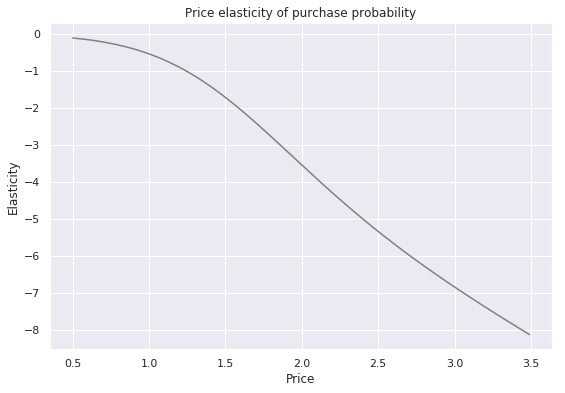

In [17]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

# What is the significance of elasticity?
## At every price point we see various elasticity values.When E(var pe) <mod(1) then then that price point is inelastic i.e. we can increase the price and there will be no such effect on purchase probability but where E>mod(1) those points are elastic i.e. increasing price will cause change or decrease purchase probability.We see mean_PE column values gets greater than 1 exactly at 1.25 so price below that can be increased without much effect in purchase probability.

# Purchase probability by segments

## Segment 1. Career-focused

In [18]:
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segments,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0


In [19]:
df_pa_segment1=df_pa[df_pa['Segments']==1]

In [20]:
Y=df_pa_segment1['Incidence']

In [21]:
X=pd.DataFrame()

In [22]:
X['Mean_price']=(df_pa_segment1['Price_1']+
                df_pa_segment1['Price_2']+
                df_pa_segment1['Price_3']+
                df_pa_segment1['Price_4']+
                df_pa_segment1['Price_5'])/5

In [23]:
model_incidence_segment1=LogisticRegression(solver='sag')#solver is a technique for iteration optimization problem in logistic regression sag is optimal for simple problem with large dataset
model_incidence_segment1.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
model_incidence_segment1.coef_

array([[-1.71199006]])

In [25]:
y_segment1=model_incidence_segment1.predict_proba(df_price_range)
purchase_pr_segment1=y_segment1[:][:,1]
pe_segment1=model_incidence_segment1.coef_[:,0]*price_range*(1-purchase_pr_segment1)#we are considering the probabilities to buy a prduct

## Results

In [26]:
df_price_elasticities['PE_segment1']=pe_segment1
df_price_elasticities

,Price_Point,Mean_PE,PE_segment1
0,0.50,-0.096496,-0.119105
1,0.51,-0.100569,-0.123289
2,0.52,-0.104769,-0.127566
3,0.53,-0.109099,-0.131938
4,0.54,-0.113563,-0.136406
5,0.55,-0.118164,-0.140972
6,0.56,-0.122904,-0.145637
7,0.57,-0.127789,-0.150403
8,0.58,-0.132820,-0.155271
9,0.59,-0.138001,-0.160243


Text(0.5, 1.0, 'Price elasticity of purchase probability')

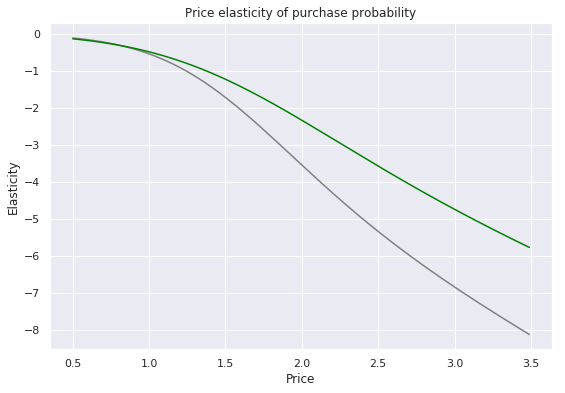

In [27]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment1,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

## Career focused is less elastic mainly from 1.39 dollars

# 2.Fewer Opportunities

In [28]:
df_pa_segment2=df_pa[df_pa['Segments']==2]

In [29]:
Y=df_pa_segment2['Incidence']
X=pd.DataFrame()
X['Mean_price']=(df_pa_segment2['Price_1']+
                df_pa_segment2['Price_2']+
                df_pa_segment2['Price_3']+
                df_pa_segment2['Price_4']+
                df_pa_segment2['Price_5'])/5
model_incidence_segment2=LogisticRegression(solver='sag')#solver is a technique for iteration optimization problem in logistic regression sag is optimal for simple problem with large dataset
model_incidence_segment2.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
model_incidence_segment2.coef_

array([[-3.63936248]])

In [31]:
y_segment2=model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2=y_segment2[:][:,1]
pe_segment2=model_incidence_segment2.coef_[:,0]*price_range*(1-purchase_pr_segment2)#we are considering the probabilities to buy a prduct

## Results

In [32]:
df_price_elasticities['PE_segment2']=pe_segment2
#df_price_elasticities

Text(0.5, 1.0, 'Price elasticity of purchase probability')

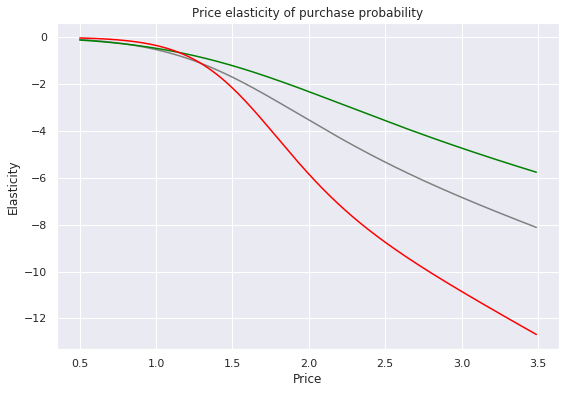

In [33]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment1,color='green')
plt.plot(price_range,pe_segment2,color='red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

## Red line is lower and steeper than both.So we can say they are very price sensitive with increase in price they beocme more elastic very quickly.

## At lower price red line seems to be inelastic i.e. increase in price wont bother at lower price chocolates.

# 3.Well-off

In [34]:
df_pa_segment3=df_pa[df_pa['Segments']==3]

In [35]:
Y=df_pa_segment3['Incidence']
X=pd.DataFrame()
X['Mean_price']=(df_pa_segment3['Price_1']+
                df_pa_segment3['Price_2']+
                df_pa_segment3['Price_3']+
                df_pa_segment3['Price_4']+
                df_pa_segment3['Price_5'])/5
model_incidence_segment3=LogisticRegression(solver='sag')#solver is a technique for iteration optimization problem in logistic regression sag is optimal for simple problem with large dataset
model_incidence_segment3.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
model_incidence_segment3.coef_

array([[-1.24535368]])

In [37]:
y_segment3=model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3=y_segment3[:][:,1]
pe_segment3=model_incidence_segment3.coef_[:,0]*price_range*(1-purchase_pr_segment3)#we are considering the probabilities to buy a prduct

In [38]:
df_price_elasticities['PE_segment3']=pe_segment3
#df_price_elasticities

Text(0.5, 1.0, 'Price elasticity of purchase probability')

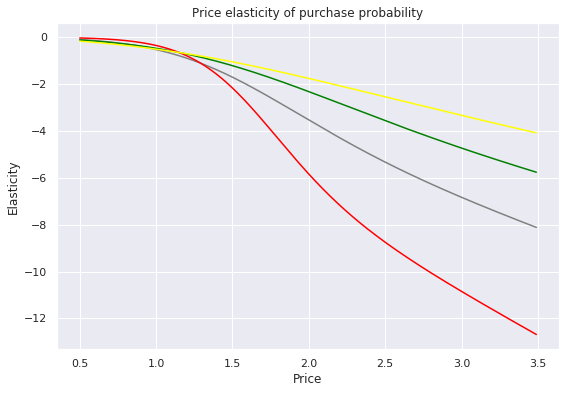

In [39]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment1,color='green')
plt.plot(price_range,pe_segment2,color='red')
plt.plot(price_range,pe_segment3,color='yellow')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

# 0.Standard

In [40]:
df_pa_segment0=df_pa[df_pa['Segments']==0]

In [41]:
Y=df_pa_segment0['Incidence']
X=pd.DataFrame()
X['Mean_price']=(df_pa_segment0['Price_1']+
                df_pa_segment0['Price_2']+
                df_pa_segment0['Price_3']+
                df_pa_segment0['Price_4']+
                df_pa_segment0['Price_5'])/5
model_incidence_segment0=LogisticRegression(solver='sag')#solver is a technique for iteration optimization problem in logistic regression sag is optimal for simple problem with large dataset
model_incidence_segment0.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
model_incidence_segment0.coef_

array([[-1.50828321]])

In [43]:
y_segment0=model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0=y_segment0[:][:,1]
pe_segment0=model_incidence_segment0.coef_[:,0]*price_range*(1-purchase_pr_segment0)#we are considering the probabilities to buy a prduct

In [44]:
df_price_elasticities['PE_segment0']=pe_segment0
#df_price_elasticities

Text(0.5, 1.0, 'Price elasticity of purchase probability')

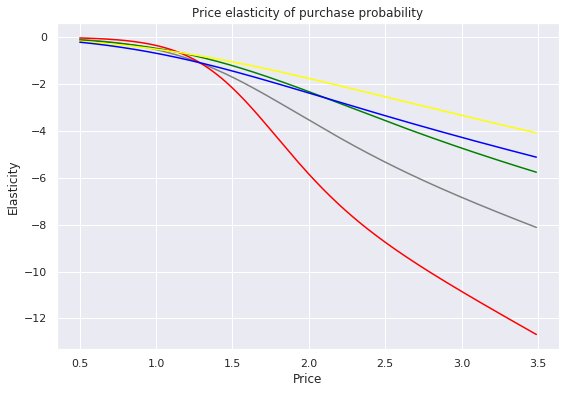

In [45]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment1,color='green')
plt.plot(price_range,pe_segment2,color='red')
plt.plot(price_range,pe_segment3,color='yellow')
plt.plot(price_range,pe_segment0,color='blue')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price elasticity of purchase probability')

# As expected well-off are the most inelastic price changes doesn't affect them.Then standard followed by career focused and fewer opportunities.

## Interestingly at the strating point the fewer opportunities seems most inelastic.It seems they are very fond of chocolates and doesnt care increase in the price of low cost chocolates.

# Elasticity based on promotion

In [46]:
Y=df_pa['Incidence']
X=pd.DataFrame()
X['Mean_price']=(df_pa['Price_1']+
                df_pa['Price_2']+
                df_pa['Price_3']+
                df_pa['Price_4']+
                df_pa['Price_5'])/5
X['Mean_promotion']=(df_pa['Promotion_1']+
                df_pa['Promotion_2']+
                df_pa['Promotion_3']+
                df_pa['Promotion_4']+
                df_pa['Promotion_5'])/5
X.head()

,Mean_price,Mean_promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model estimation

In [47]:
model_incidence_promotion=LogisticRegression(solver='sag')#solver is a technique for iteration optimization problem in logistic regression sag is optimal for simple problem with large dataset
model_incidence_promotion.fit(X,Y)
model_incidence_promotion.coef_

array([[-1.49367296,  0.56081995]])

## Price elasticity with promotion

In [48]:
df_price_elasticity_promotion=pd.DataFrame(price_range)
df_price_elasticity_promotion=df_price_elasticity_promotion.rename(columns={0:'Price Range'})

In [49]:
df_price_elasticity_promotion['Promotion']=1

In [50]:
y_promotion=model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [51]:
promo=y_promotion[:,1]
price_elasticity_promo=model_incidence_promotion.coef_[:,0]*price_range*(1-promo)

In [52]:
df_price_elasticities['Elasticity_Promotion_1']=price_elasticity_promo
#df_price_elasticities

In [53]:
df_price_elasticity_promotion=pd.DataFrame(price_range)
df_price_elasticity_promotion=df_price_elasticity_promotion.rename(columns={0:'Price Range'})
df_price_elasticity_promotion['Promotion']=0
y_promotion=model_incidence_promotion.predict_proba(df_price_elasticity_promotion)
promo=y_promotion[:,1]
price_elasticity_promo=model_incidence_promotion.coef_[:,0]*price_range*(1-promo)

In [54]:
df_price_elasticities['Elasticity_Promotion_0']=price_elasticity_promo
#df_price_elasticities

Text(0.5, 1.0, 'Promotion elasticity of purchase probability (with(red) and without(green))')

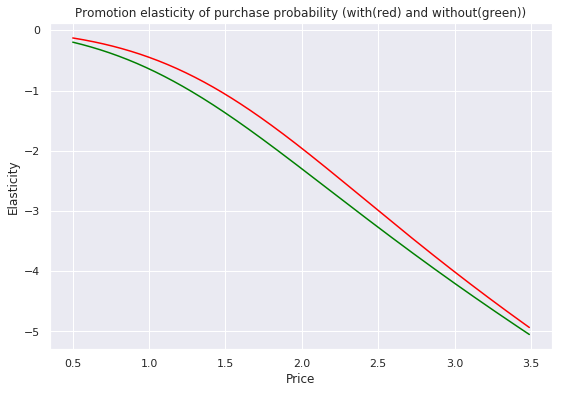

In [55]:
plt.figure(figsize=(9,6))
plt.plot(price_range,df_price_elasticities['Elasticity_Promotion_0'],color='green')
plt.plot(price_range,df_price_elasticities['Elasticity_Promotion_1'],color='red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Promotion elasticity of purchase probability (with(red) and without(green))')

In [56]:
df_price_elasticities

,Price_Point,Mean_PE,PE_segment1,PE_segment2,PE_segment3,PE_segment0,Elasticity_Promotion_1,Elasticity_Promotion_0
0,0.50,-0.096496,-0.119105,-0.030933,-0.168062,-0.211170,-0.125816,-0.195653
1,0.51,-0.100569,-0.123289,-0.032700,-0.172987,-0.217741,-0.129934,-0.201774
2,0.52,-0.104769,-0.127566,-0.034555,-0.177981,-0.224418,-0.134131,-0.207998
3,0.53,-0.109099,-0.131938,-0.036500,-0.183047,-0.231205,-0.138409,-0.214324
4,0.54,-0.113563,-0.136406,-0.038540,-0.188184,-0.238101,-0.142767,-0.220755
5,0.55,-0.118164,-0.140972,-0.040679,-0.193392,-0.245106,-0.147207,-0.227290
6,0.56,-0.122904,-0.145637,-0.042921,-0.198673,-0.252223,-0.151729,-0.233931
7,0.57,-0.127789,-0.150403,-0.045272,-0.204027,-0.259451,-0.156336,-0.240679
8,0.58,-0.132820,-0.155271,-0.047735,-0.209453,-0.266791,-0.161028,-0.247534
9,0.59,-0.138001,-0.160243,-0.050315,-0.214953,-0.274245,-0.165806,-0.254497


# From the above table we can see that when 1.45 dollar without promotion is inelastic but if same price is reduced during promotion it becomes inelastic. 

# Brand Choice

## Data Preparation

In [57]:
brand_choice=df_pa[df_pa['Incidence']==1]

In [58]:
pd.options.display.max_rows=50
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segments,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
52,200000001,327,1,4,3,0,0,1.47,1.89,2.01,...,47,1,110866,1,0,2,0,0,1,0
79,200000001,547,1,2,2,0,0,1.35,1.89,2.07,...,47,1,110866,1,0,2,0,0,1,0
80,200000001,562,1,2,3,2,1,1.33,1.51,2.07,...,47,1,110866,1,0,2,0,0,1,0
97,200000001,702,1,5,1,0,0,1.41,1.85,2.00,...,47,1,110866,1,0,2,0,0,1,0
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1


In [59]:
Y=brand_choice['Brand']

In [60]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segments',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [61]:
features=['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']
X=brand_choice[features]

In [62]:
model_brand_choice=LogisticRegression(solver='sag',multi_class='multinomial')#solver is a technique for iteration optimization problem in logistic regression sag is optimal for simple problem with large dataset
model_brand_choice.fit(X,Y)
model_brand_choice.coef_

array([[-3.9159583 ,  0.65846192,  2.41770901,  0.7040827 , -0.20211406],
       [ 1.27460809, -1.87985559, -0.21266285, -0.20634402,  0.58786589],
       [ 1.62420363,  0.56210946,  0.50095205,  1.03951958,  0.45280706],
       [ 0.57453107,  0.39558677, -1.40063057, -1.24624771,  0.24934494],
       [ 0.44261551,  0.26369744, -1.30536765, -0.29101055, -1.08790383]])

# 5*5 array because 5 brands and 5 features are present

In [63]:
bc_coef=pd.DataFrame(np.transpose(model_brand_choice.coef_))#features as rows and output variables as columns
coefficients=['Coef_Brand_1','Coef_Brand_2','Coef_Brand_3','Coef_Brand_4','Coef_Brand_5']
bc_coef.columns=[coefficients]
prices=['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef.index=[prices]
bc_coef=bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own brand effect and cross brand effect: we see in coeff_brand_1 its coeff with its own price i.e. price_1 is negative that means increase in price means decrease in sell.But with others except price_5 it is positive.That menas other brands except 5 increase in price will cause increase in sell of brand 1.

## Own price elasticity brand 5

In [64]:
df_own_brand_5=pd.DataFrame(index=np.arange(price_range.size))# to indicate the size of the dataframe
df_own_brand_5['Price_1']=brand_choice['Price_1'].mean()
df_own_brand_5['Price_2']=brand_choice['Price_2'].mean()
df_own_brand_5['Price_3']=brand_choice['Price_3'].mean()
df_own_brand_5['Price_4']=brand_choice['Price_4'].mean()
df_own_brand_5['Price_5']=price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
5,1.384559,1.764717,2.006694,2.159658,0.55
6,1.384559,1.764717,2.006694,2.159658,0.56
7,1.384559,1.764717,2.006694,2.159658,0.57
8,1.384559,1.764717,2.006694,2.159658,0.58
9,1.384559,1.764717,2.006694,2.159658,0.59


In [65]:
predict_brand_5=model_brand_choice.predict_proba(df_own_brand_5)

In [66]:
pr_own_brand_5=predict_brand_5[:][:,4]

In [67]:
beta5=bc_coef.iloc[4,4]
beta5

-1.09

In [68]:
own_price_elasticity_brand_5=beta5*price_range*(1-pr_own_brand_5)

In [69]:
df_price_elasticities['Brand_5']=own_price_elasticity_brand_5

df_price_elasticities

,Price_Point,Mean_PE,PE_segment1,PE_segment2,PE_segment3,PE_segment0,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096496,-0.119105,-0.030933,-0.168062,-0.211170,-0.125816,-0.195653,-0.049055
1,0.51,-0.100569,-0.123289,-0.032700,-0.172987,-0.217741,-0.129934,-0.201774,-0.050616
2,0.52,-0.104769,-0.127566,-0.034555,-0.177981,-0.224418,-0.134131,-0.207998,-0.052207
3,0.53,-0.109099,-0.131938,-0.036500,-0.183047,-0.231205,-0.138409,-0.214324,-0.053827
4,0.54,-0.113563,-0.136406,-0.038540,-0.188184,-0.238101,-0.142767,-0.220755,-0.055477
5,0.55,-0.118164,-0.140972,-0.040679,-0.193392,-0.245106,-0.147207,-0.227290,-0.057158
6,0.56,-0.122904,-0.145637,-0.042921,-0.198673,-0.252223,-0.151729,-0.233931,-0.058871
7,0.57,-0.127789,-0.150403,-0.045272,-0.204027,-0.259451,-0.156336,-0.240679,-0.060615
8,0.58,-0.132820,-0.155271,-0.047735,-0.209453,-0.266791,-0.161028,-0.247534,-0.062391
9,0.59,-0.138001,-0.160243,-0.050315,-0.214953,-0.274245,-0.165806,-0.254497,-0.064199


Text(0.5, 1.0, 'Own price elasticity of purchase probability for brand 5')

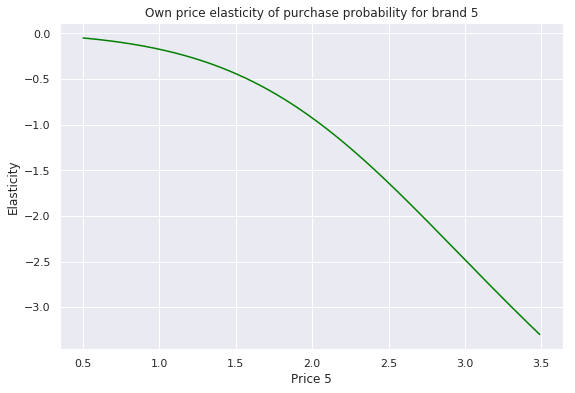

In [70]:
plt.figure(figsize=(9,6))
plt.plot(price_range,df_price_elasticities['Brand_5'],color='green')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own price elasticity of purchase probability for brand 5')

## Cross-Price Elasticity Brand 5,Cross Band 4(we would examine how change of price of brand 4 will affect brand 5)

In [71]:
df_brand5_cross_brand4=pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4['Price_1']=brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2']=brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3']=brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4']=price_range
df_brand5_cross_brand4['Price_5']=brand_choice['Price_5'].mean()

In [72]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [73]:
predict_brand5_cross_brand4=model_brand_choice.predict_proba(df_brand5_cross_brand4)

## For cross brand elasticities elasticity,E=-{beta(own price)}*{price(cross brand)}*{Pr(cross brand)}

In [74]:
pr_brand4=predict_brand5_cross_brand4[:][:,3]#purchase probability for brand 4

In [75]:
beta5#coeff for brand 5 calculated above

-1.09

In [76]:
brand5_cross_brand4_price_elasticity=-beta5*price_range*pr_brand4

In [77]:
df_price_elasticities['Brand_5_Cross_Brand_4']=brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_segment1,PE_segment2,PE_segment3,PE_segment0,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096496,-0.119105,-0.030933,-0.168062,-0.211170,-0.125816,-0.195653,-0.049055,0.332012
1,0.51,-0.100569,-0.123289,-0.032700,-0.172987,-0.217741,-0.129934,-0.201774,-0.050616,0.337288
2,0.52,-0.104769,-0.127566,-0.034555,-0.177981,-0.224418,-0.134131,-0.207998,-0.052207,0.342507
3,0.53,-0.109099,-0.131938,-0.036500,-0.183047,-0.231205,-0.138409,-0.214324,-0.053827,0.347669
4,0.54,-0.113563,-0.136406,-0.038540,-0.188184,-0.238101,-0.142767,-0.220755,-0.055477,0.352774
5,0.55,-0.118164,-0.140972,-0.040679,-0.193392,-0.245106,-0.147207,-0.227290,-0.057158,0.357821
6,0.56,-0.122904,-0.145637,-0.042921,-0.198673,-0.252223,-0.151729,-0.233931,-0.058871,0.362810
7,0.57,-0.127789,-0.150403,-0.045272,-0.204027,-0.259451,-0.156336,-0.240679,-0.060615,0.367741
8,0.58,-0.132820,-0.155271,-0.047735,-0.209453,-0.266791,-0.161028,-0.247534,-0.062391,0.372615
9,0.59,-0.138001,-0.160243,-0.050315,-0.214953,-0.274245,-0.165806,-0.254497,-0.064199,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of brand 5 wrt brand 4')

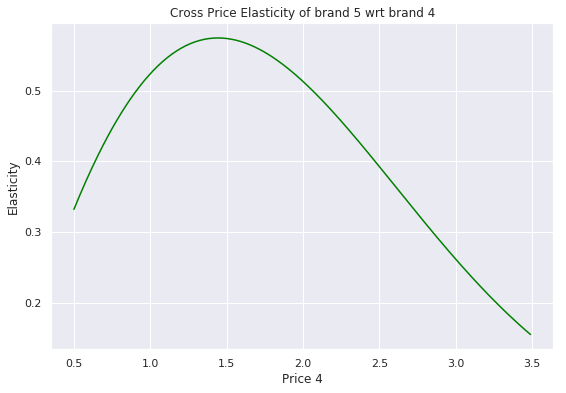

In [78]:
plt.figure(figsize=(9,6))
plt.plot(price_range,brand5_cross_brand4_price_elasticity,color='green')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of brand 5 wrt brand 4')

## In the above diagram the elasticity is always greater than 0(look at the y-axis values it is always above 0).It is a fact between brands of same type of product of various companies the elasticity is always greater than 0.What need to see is that for every brand there is a certain price range above which and below which they would not go.So,even if they increase or decrease price the elasticity is always greater than 0(between brands selling the same type of products).So, what we have look is that what happens to the elasticity for particular customer segments.Beacuse particular brands try to target particular customer segement.

## Own and cross-price elasticity by segments.

## Well-off(earlier we saw well off has liking for brand 4 so it is interesting to check how they will react to price changes in brand 4)

In [79]:
brand_choice_s3=df_pa[df_pa['Incidence']==1]
brand_choice_s3=brand_choice_s3[brand_choice_s3['Segments']==3]#3 is well-off

pd.options.display.max_rows=100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segments,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
159,200000002,459,1,4,1,0,0,1.47,1.48,2.02,...,52,2,159052,2,1,3,0,0,0,1
160,200000002,468,1,4,2,4,1,1.28,1.36,2.02,...,52,2,159052,2,1,3,0,0,0,1
161,200000002,471,1,4,3,4,1,1.39,1.36,2.02,...,52,2,159052,2,1,3,0,0,0,1
163,200000002,498,1,2,3,0,0,1.19,1.57,2.06,...,52,2,159052,2,1,3,0,0,0,1
164,200000002,508,1,4,1,2,1,1.34,1.88,2.07,...,52,2,159052,2,1,3,0,0,0,1


In [80]:
#Model estimation
Y=brand_choice_s3['Brand']
brand_choice_s3=pd.get_dummies(brand_choice_s3,columns=['Brand'],prefix='Brand',prefix_sep='_')
X=brand_choice_s3[features]
model_brand_choice_s3=LogisticRegression(solver='sag',multi_class='multinomial',max_iter=300)#solver is a technique for iteration optimization problem in logistic regression sag is optimal for simple problem with large dataset
model_brand_choice_s3.fit(X,Y)

#coefficient table for segment 3
bc_coef=pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))#features as rows and output variables as columns
coefficients=['Coef_Brand_1','Coef_Brand_2','Coef_Brand_3','Coef_Brand_4','Coef_Brand_5']
bc_coef.columns=[coefficients]
prices=['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef.index=[prices]
bc_coef=bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


In [81]:
#beta5=bc_coef.iloc[4][4]
#beta5=-1.09
beta5
#probably beta5 here considered wrong in video should have been the new bc_coef.iloc[4][4] but considered the last one

-1.09

## Own price range elasticity(only well off)

In [82]:
df_own_brand_5_s3=pd.DataFrame(index=np.arange(price_range.size))# to indicate the size of the dataframe
df_own_brand_5_s3['Price_1']=brand_choice['Price_1'].mean()
df_own_brand_5_s3['Price_2']=brand_choice['Price_2'].mean()
df_own_brand_5_s3['Price_3']=brand_choice['Price_3'].mean()
df_own_brand_5_s3['Price_4']=brand_choice['Price_4'].mean()
df_own_brand_5_s3['Price_5']=price_range

predict_brand_5_s3=model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3=predict_brand_5_s3[:][:,4] 

own_price_elasticity_brand_5_s3=beta5*price_range*(1-pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3']=own_price_elasticity_brand_5_s3

## Cross brand price elasticity

In [83]:
df_brand5_cross_brand4_s3=pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1']=brand_choice['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2']=brand_choice['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3']=brand_choice['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4']=price_range
df_brand5_cross_brand4_s3['Price_5']=brand_choice['Price_5'].mean()

predict_brand5_cross_brand4_s3=model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3=predict_brand5_cross_brand4_s3[:][:,3]

brand5_cross_brand4_price_elasticity_s3=-beta5*price_range*pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_S3']=brand5_cross_brand4_price_elasticity_s3
df_price_elasticities

,Price_Point,Mean_PE,PE_segment1,PE_segment2,PE_segment3,PE_segment0,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_S3
0,0.50,-0.096496,-0.119105,-0.030933,-0.168062,-0.211170,-0.125816,-0.195653,-0.049055,0.332012,-0.300418,0.481961
1,0.51,-0.100569,-0.123289,-0.032700,-0.172987,-0.217741,-0.129934,-0.201774,-0.050616,0.337288,-0.306504,0.491255
2,0.52,-0.104769,-0.127566,-0.034555,-0.177981,-0.224418,-0.134131,-0.207998,-0.052207,0.342507,-0.312599,0.500533
3,0.53,-0.109099,-0.131938,-0.036500,-0.183047,-0.231205,-0.138409,-0.214324,-0.053827,0.347669,-0.318705,0.509796
4,0.54,-0.113563,-0.136406,-0.038540,-0.188184,-0.238101,-0.142767,-0.220755,-0.055477,0.352774,-0.324820,0.519042
5,0.55,-0.118164,-0.140972,-0.040679,-0.193392,-0.245106,-0.147207,-0.227290,-0.057158,0.357821,-0.330946,0.528273
6,0.56,-0.122904,-0.145637,-0.042921,-0.198673,-0.252223,-0.151729,-0.233931,-0.058871,0.362810,-0.337083,0.537487
7,0.57,-0.127789,-0.150403,-0.045272,-0.204027,-0.259451,-0.156336,-0.240679,-0.060615,0.367741,-0.343231,0.546685
8,0.58,-0.132820,-0.155271,-0.047735,-0.209453,-0.266791,-0.161028,-0.247534,-0.062391,0.372615,-0.349391,0.555867
9,0.59,-0.138001,-0.160243,-0.050315,-0.214953,-0.274245,-0.165806,-0.254497,-0.064199,0.377430,-0.355563,0.565032


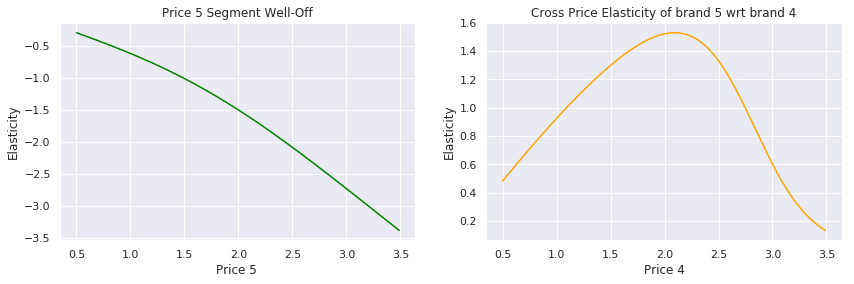

In [84]:
fig,axs=plt.subplots(1,2,figsize=(14,4))
axs[0].plot(price_range,own_price_elasticity_brand_5_s3,color='green')
axs[0].set_xlabel('Price 5 ')
axs[0].set_title('Price 5 Segment Well-Off')

axs[1].plot(price_range,brand5_cross_brand4_price_elasticity_s3,color='orange')
axs[1].set_xlabel('Price 4')
axs[1].set_title('Cross Price Elasticity of brand 5 wrt brand 4')

for ax in axs.flat:
    ax.set(ylabel='Elasticity')


## Last two min of lecture 56 is very important to gain insights from the above graph.

## Fewer Opportunities

In [90]:
brand_choice_s2=df_pa[df_pa['Incidence']==1]
brand_choice_s2=brand_choice_s2[brand_choice_s2['Segments']==2]#2 is Fewer Opportunities

#Model estimation
Y=brand_choice_s2['Brand']
brand_choice_s2=pd.get_dummies(brand_choice_s2,columns=['Brand'],prefix='Brand',prefix_sep='_')
X=brand_choice_s2[features]#features were defined earlier
model_brand_choice_s2=LogisticRegression(solver='sag',multi_class='multinomial',max_iter=300)#solver is a technique for iteration optimization problem in logistic regression sag is optimal for simple problem with large dataset
model_brand_choice_s2.fit(X,Y)

#coefficient table for segment 3
bc_coef=pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))#features as rows and output variables as columns
coefficients=['Coef_Brand_1','Coef_Brand_2','Coef_Brand_3','Coef_Brand_4','Coef_Brand_5']
bc_coef.columns=[coefficients]
prices=['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef.index=[prices]
bc_coef=bc_coef.round(2)

#Own brand price elasticity
df_own_brand_5_s2=pd.DataFrame(index=np.arange(price_range.size))# to indicate the size of the dataframe
df_own_brand_5_s2['Price_1']=brand_choice['Price_1'].mean()
df_own_brand_5_s2['Price_2']=brand_choice['Price_2'].mean()
df_own_brand_5_s2['Price_3']=brand_choice['Price_3'].mean()
df_own_brand_5_s2['Price_4']=brand_choice['Price_4'].mean()
df_own_brand_5_s2['Price_5']=price_range

predict_brand_5_s2=model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2=predict_brand_5_s2[:][:,4] 

own_price_elasticity_brand_5_s2=beta5*price_range*(1-pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S2']=own_price_elasticity_brand_5_s2


#Cross brand price elasticity
df_brand5_cross_brand4_s2=pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1']=brand_choice['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2']=brand_choice['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3']=brand_choice['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4']=price_range
df_brand5_cross_brand4_s2['Price_5']=brand_choice['Price_5'].mean()

predict_brand5_cross_brand4_s2=model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2=predict_brand5_cross_brand4_s2[:][:,3]

brand5_cross_brand4_price_elasticity_s2=-beta5*price_range*pr_cross_brand_5_s2
df_price_elasticities['Brand_5_Cross_Brand_S2']=brand5_cross_brand4_price_elasticity_s2
df_price_elasticities

,Price_Point,Mean_PE,PE_segment1,PE_segment2,PE_segment3,PE_segment0,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_S3,Brand 5 S2,Brand_5_Cross_Brand_S2
0,0.50,-0.096496,-0.119105,-0.030933,-0.168062,-0.211170,-0.125816,-0.195653,-0.049055,0.332012,-0.300418,0.481961,-0.300418,0.184917
1,0.51,-0.100569,-0.123289,-0.032700,-0.172987,-0.217741,-0.129934,-0.201774,-0.050616,0.337288,-0.306504,0.491255,-0.306504,0.187284
2,0.52,-0.104769,-0.127566,-0.034555,-0.177981,-0.224418,-0.134131,-0.207998,-0.052207,0.342507,-0.312599,0.500533,-0.312599,0.189601
3,0.53,-0.109099,-0.131938,-0.036500,-0.183047,-0.231205,-0.138409,-0.214324,-0.053827,0.347669,-0.318705,0.509796,-0.318705,0.191870
4,0.54,-0.113563,-0.136406,-0.038540,-0.188184,-0.238101,-0.142767,-0.220755,-0.055477,0.352774,-0.324820,0.519042,-0.324820,0.194089
5,0.55,-0.118164,-0.140972,-0.040679,-0.193392,-0.245106,-0.147207,-0.227290,-0.057158,0.357821,-0.330946,0.528273,-0.330946,0.196261
6,0.56,-0.122904,-0.145637,-0.042921,-0.198673,-0.252223,-0.151729,-0.233931,-0.058871,0.362810,-0.337083,0.537487,-0.337083,0.198384
7,0.57,-0.127789,-0.150403,-0.045272,-0.204027,-0.259451,-0.156336,-0.240679,-0.060615,0.367741,-0.343231,0.546685,-0.343231,0.200459
8,0.58,-0.132820,-0.155271,-0.047735,-0.209453,-0.266791,-0.161028,-0.247534,-0.062391,0.372615,-0.349391,0.555867,-0.349391,0.202487
9,0.59,-0.138001,-0.160243,-0.050315,-0.214953,-0.274245,-0.165806,-0.254497,-0.064199,0.377430,-0.355563,0.565032,-0.355563,0.204467


## Career Focused

In [92]:
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segments'] == 1]

Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities['Brand 5 S1']=own_price_elasticity_brand_5_s1

df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities['Brand_5_Cross_Brand_S1']=brand5_cross_brand4_price_elasticity_s1

## Standard

In [93]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segments'] == 0]


Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities['Brand 5 S0']=own_price_elasticity_brand_5_s0

df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities['Brand_5_Cross_Brand_S0']=brand5_cross_brand4_price_elasticity_s0

Text(0.5, 0, 'Price 4')

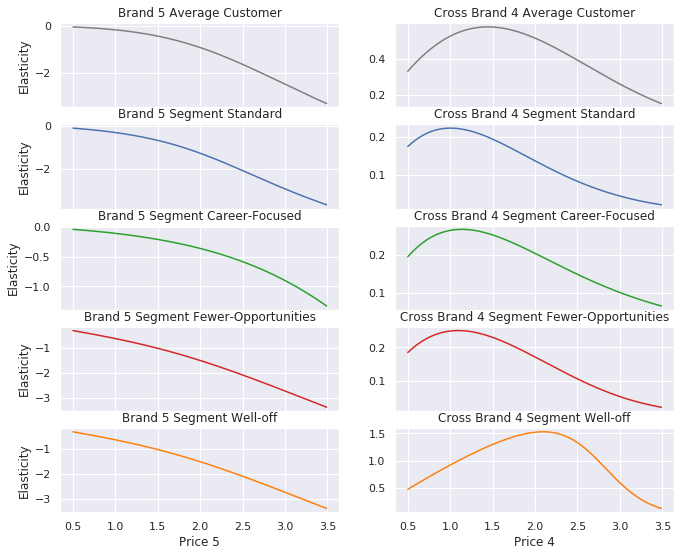

In [94]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

## Watch lecture 58 for the explanation of above graphs.

In [95]:
df_purcahse_quantity=df_pa[df_pa['Incidence']==1]
df_purcahse_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segments,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [96]:
df_purcahse_quantity=pd.get_dummies(df_purcahse_quantity,columns=['Brand'],prefix='Brand',prefix_sep='_')
df_purcahse_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segments,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.581910,0.175229,0.299290,0.293824,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.028171,0.380176,0.457962,0.455528,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
df_purcahse_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segments',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [102]:
df_purcahse_quantity['Price_Incidence']=(df_purcahse_quantity['Brand_1']*df_purcahse_quantity['Price_1']+
                                        df_purcahse_quantity['Brand_2']*df_purcahse_quantity['Price_2']+
                                        df_purcahse_quantity['Brand_3']*df_purcahse_quantity['Price_3']+
                                        df_purcahse_quantity['Brand_4']*df_purcahse_quantity['Price_4']+
                                        df_purcahse_quantity['Brand_5']*df_purcahse_quantity['Price_5'])

In [100]:
df_purcahse_quantity['Promotion_Incidence']=(df_purcahse_quantity['Brand_1']*df_purcahse_quantity['Promotion_1']+
                                            df_purcahse_quantity['Brand_2']*df_purcahse_quantity['Promotion_2']+
                                            df_purcahse_quantity['Brand_3']*df_purcahse_quantity['Promotion_3']+
                                            df_purcahse_quantity['Brand_4']*df_purcahse_quantity['Promotion_4']+
                                            df_purcahse_quantity['Brand_5']*df_purcahse_quantity['Promotion_5'])

## Model Estimation Linear Rgression

In [103]:
X=df_purcahse_quantity[['Price_Incidence','Promotion_Incidence']]
X.head()

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0


In [107]:
Y=df_purcahse_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [108]:
model_quantity=LinearRegression()
model_quantity.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
model_quantity.coef_
#promotion_inccidence coefficient is very interesting with increase in promotion quantity of buying is getting less may be that is beacuse we are not focusing in any particuar brand and considering the average customer.

array([-0.8173651 , -0.10504673])

## Price Elasticity Estimation

In [110]:
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [111]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.817365101668501

In [113]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [114]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [115]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_segment1,PE_segment2,PE_segment3,PE_segment0,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_S3,Brand 5 S2,Brand_5_Cross_Brand_S2,Brand 5 S1,Brand_5_Cross_Brand_S1,Brand 5 S0,Brand_5_Cross_Brand_S0,PE_Quantity_Promotion_1
0,0.50,-0.096496,-0.119105,-0.030933,-0.168062,-0.211170,-0.125816,-0.195653,-0.049055,0.332012,-0.300418,0.481961,-0.300418,0.184917,-0.043941,0.194769,-0.115840,0.174124,-0.102157
1,0.51,-0.100569,-0.123289,-0.032700,-0.172987,-0.217741,-0.129934,-0.201774,-0.050616,0.337288,-0.306504,0.491255,-0.306504,0.187284,-0.045028,0.197253,-0.118879,0.176180,-0.104413
2,0.52,-0.104769,-0.127566,-0.034555,-0.177981,-0.224418,-0.134131,-0.207998,-0.052207,0.342507,-0.312599,0.500533,-0.312599,0.189601,-0.046124,0.199686,-0.121953,0.178185,-0.106679
3,0.53,-0.109099,-0.131938,-0.036500,-0.183047,-0.231205,-0.138409,-0.214324,-0.053827,0.347669,-0.318705,0.509796,-0.318705,0.191870,-0.047229,0.202068,-0.125063,0.180138,-0.108954
4,0.54,-0.113563,-0.136406,-0.038540,-0.188184,-0.238101,-0.142767,-0.220755,-0.055477,0.352774,-0.324820,0.519042,-0.324820,0.194089,-0.048344,0.204400,-0.128207,0.182042,-0.111238
5,0.55,-0.118164,-0.140972,-0.040679,-0.193392,-0.245106,-0.147207,-0.227290,-0.057158,0.357821,-0.330946,0.528273,-0.330946,0.196261,-0.049469,0.206683,-0.131388,0.183895,-0.113532
6,0.56,-0.122904,-0.145637,-0.042921,-0.198673,-0.252223,-0.151729,-0.233931,-0.058871,0.362810,-0.337083,0.537487,-0.337083,0.198384,-0.050603,0.208915,-0.134606,0.185699,-0.115836
7,0.57,-0.127789,-0.150403,-0.045272,-0.204027,-0.259451,-0.156336,-0.240679,-0.060615,0.367741,-0.343231,0.546685,-0.343231,0.200459,-0.051746,0.211098,-0.137860,0.187453,-0.118148
8,0.58,-0.132820,-0.155271,-0.047735,-0.209453,-0.266791,-0.161028,-0.247534,-0.062391,0.372615,-0.349391,0.555867,-0.349391,0.202487,-0.052900,0.213232,-0.141152,0.189159,-0.120471
9,0.59,-0.138001,-0.160243,-0.050315,-0.214953,-0.274245,-0.165806,-0.254497,-0.064199,0.377430,-0.355563,0.565032,-0.355563,0.204467,-0.054063,0.215318,-0.144482,0.190816,-0.122803


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

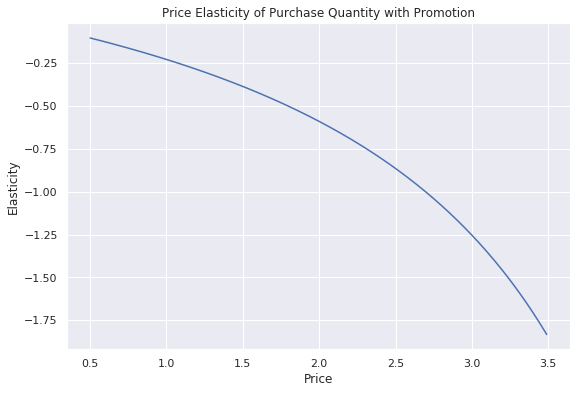

In [116]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

In [117]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0

predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity

df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_segment1,PE_segment2,PE_segment3,PE_segment0,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_S3,Brand 5 S2,Brand_5_Cross_Brand_S2,Brand 5 S1,Brand_5_Cross_Brand_S1,Brand 5 S0,Brand_5_Cross_Brand_S0,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096496,-0.119105,-0.030933,-0.168062,-0.211170,-0.125816,-0.195653,-0.049055,0.332012,-0.300418,0.481961,-0.300418,0.184917,-0.043941,0.194769,-0.115840,0.174124,-0.102157,-0.099543
1,0.51,-0.100569,-0.123289,-0.032700,-0.172987,-0.217741,-0.129934,-0.201774,-0.050616,0.337288,-0.306504,0.491255,-0.306504,0.187284,-0.045028,0.197253,-0.118879,0.176180,-0.104413,-0.101736
2,0.52,-0.104769,-0.127566,-0.034555,-0.177981,-0.224418,-0.134131,-0.207998,-0.052207,0.342507,-0.312599,0.500533,-0.312599,0.189601,-0.046124,0.199686,-0.121953,0.178185,-0.106679,-0.103939
3,0.53,-0.109099,-0.131938,-0.036500,-0.183047,-0.231205,-0.138409,-0.214324,-0.053827,0.347669,-0.318705,0.509796,-0.318705,0.191870,-0.047229,0.202068,-0.125063,0.180138,-0.108954,-0.106150
4,0.54,-0.113563,-0.136406,-0.038540,-0.188184,-0.238101,-0.142767,-0.220755,-0.055477,0.352774,-0.324820,0.519042,-0.324820,0.194089,-0.048344,0.204400,-0.128207,0.182042,-0.111238,-0.108369
5,0.55,-0.118164,-0.140972,-0.040679,-0.193392,-0.245106,-0.147207,-0.227290,-0.057158,0.357821,-0.330946,0.528273,-0.330946,0.196261,-0.049469,0.206683,-0.131388,0.183895,-0.113532,-0.110598
6,0.56,-0.122904,-0.145637,-0.042921,-0.198673,-0.252223,-0.151729,-0.233931,-0.058871,0.362810,-0.337083,0.537487,-0.337083,0.198384,-0.050603,0.208915,-0.134606,0.185699,-0.115836,-0.112836
7,0.57,-0.127789,-0.150403,-0.045272,-0.204027,-0.259451,-0.156336,-0.240679,-0.060615,0.367741,-0.343231,0.546685,-0.343231,0.200459,-0.051746,0.211098,-0.137860,0.187453,-0.118148,-0.115083
8,0.58,-0.132820,-0.155271,-0.047735,-0.209453,-0.266791,-0.161028,-0.247534,-0.062391,0.372615,-0.349391,0.555867,-0.349391,0.202487,-0.052900,0.213232,-0.141152,0.189159,-0.120471,-0.117339
9,0.59,-0.138001,-0.160243,-0.050315,-0.214953,-0.274245,-0.165806,-0.254497,-0.064199,0.377430,-0.355563,0.565032,-0.355563,0.204467,-0.054063,0.215318,-0.144482,0.190816,-0.122803,-0.119604


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

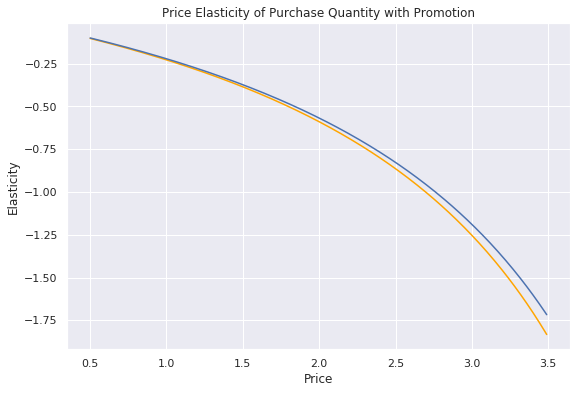

In [118]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')